<a href="https://colab.research.google.com/github/MoMahmoud8/churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jimitpanditputra/churn-modelling")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mostafamahmoudhassan
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 47.0MB/s]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/churn-modelling/Churn_Modelling.csv - Churn_Modelling.csv.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

Churn : is a data set of informtion about customer that we feed the the machine so it can tell use if he/she is going to leave or stay
the Data set consistes of 14 columns with 10 features and one target, in the following we will demo each feature

1 - CreditScore : it represents the creditworthiness of the customer

2 - Geography : is the countery were the customer is currently living

3 - Gender : this obviously the customer gender (female or male)

4 - Age : the customer age

5 - tenure : period or duration for which the loan amount is sanctioned

6 - Balance : jow much money the customer has

7 - NumOfProducts : is the number of bank retail products the customer uses

8 - HasCrCard : tells whether the customer has credit card or no

9 - IsActiveMember : the state of activation of the customer

10 - EstimatedSalary : the annual salary of the customer



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# summary statistics

*   we have 10k customers.
*   customers' credit score range between 350 and 850.
*   customers age between 18 and 92 years.
*   The maximum tenure in the bank is 10 years.
*   The maximum balance of the customer is about 250k.
*   All customers used at least 1 of the bank product and maximum 4 products.
*   We have customers who do not have any credit card.
*   The maximum estimated salaries for the Customer is about 200k.





In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df2=df.copy()

In [ ]:
df2=df2.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df2['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

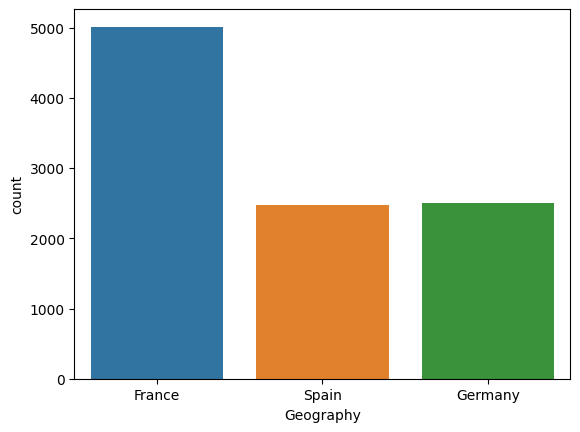

In [ ]:
sns.countplot(x=df2["Geography"])


Half of our customers are in France, 25% are in Germany and 25% are in Spain.

<Axes: xlabel='Gender', ylabel='count'>

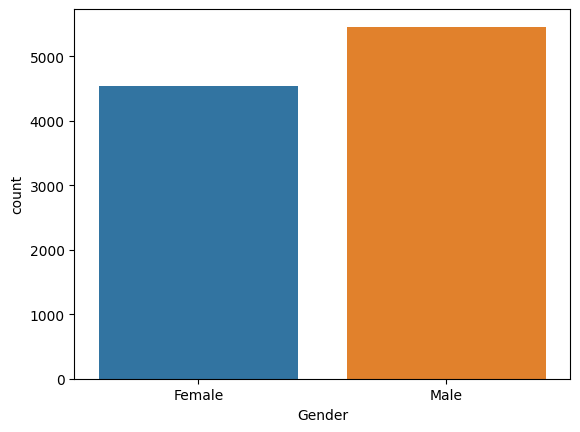

In [ ]:
sns.countplot(x=df2["Gender"])


<Axes: ylabel='Gender'>

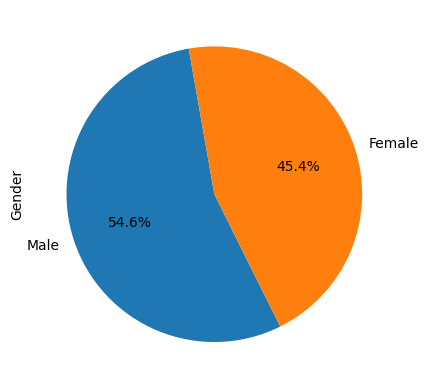

In [ ]:
df["Gender"].value_counts().plot(kind="pie",
        autopct='%1.1f%%', startangle=100)


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
labels=['1 product','2 products','3 products','4 products']
values=df2['NumOfProducts'].value_counts().values.tolist()
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.5,pull=[0,0,0.2,0.3])])
fig.update_layout(title='Number of Products')
fig.show()

most of our customer used 1 or 2 products, very much less customers are using three or four products

In [ ]:
df2['HasCrCard'] = df2['HasCrCard'].map({0: 'No CreditCard', 1: 'Has CreditCard'})
df2['IsActiveMember'] = df2['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
df2['Exited'] = df2['Exited'].map({0: 'Stayed', 1: 'Exited'})

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

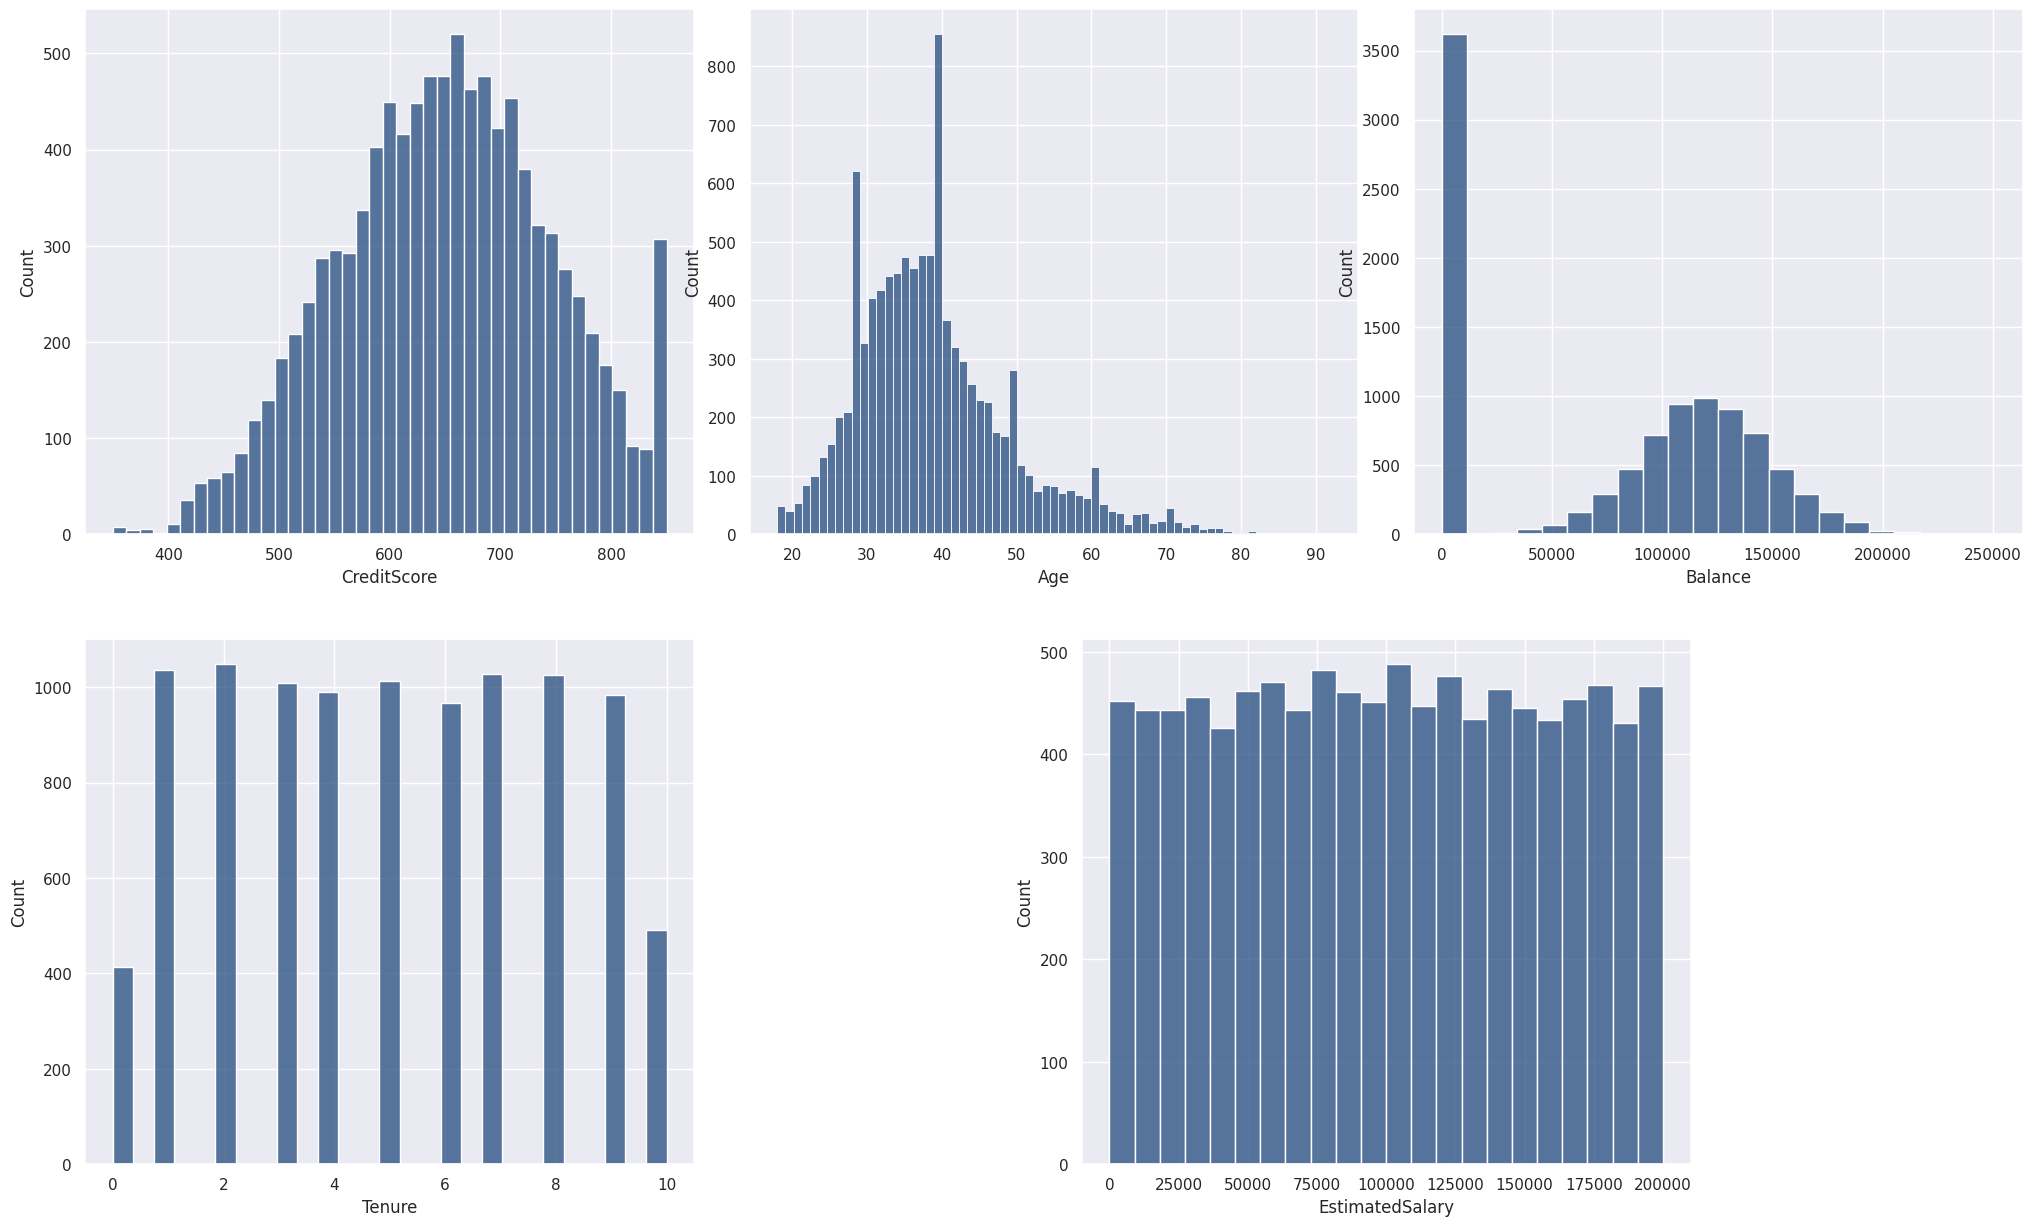

In [ ]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set_theme(palette="crest_r")
ax1=plt.subplot2grid(shape=(2,6),loc=(0,0),colspan=2)
ax2=plt.subplot2grid(shape=(2,6),loc=(0,2),colspan=2)
ax3=plt.subplot2grid(shape=(2,6),loc=(0,4),colspan=2)
ax4=plt.subplot2grid(shape=(2,6),loc=(1,0),colspan=2)
ax5=plt.subplot2grid(shape=(2,6),loc=(1,3),colspan=2)
sns.histplot(x=df2["CreditScore"],ax=ax1)
sns.histplot(x=df2["Age"],ax=ax2)
sns.histplot(x=df2["Balance"],ax=ax3)
sns.histplot(x=df2["Tenure"],ax=ax4)
sns.histplot(x=df2["EstimatedSalary"],ax=ax5)



*   Credit Score looks normally distributed with mean=650 and range between 400 and 580
*   Age : Majority of customers ages range between 30 and 50 years
*   Balance looks normally distributed except around 3600 customer have ZERO bank balance
*   Tenure :Majority of customers Tenures range between 1 and 9 years
*   we have around the same number of customers for all different estimated salaries





<Axes: xlabel='IsActiveMember', ylabel='count'>

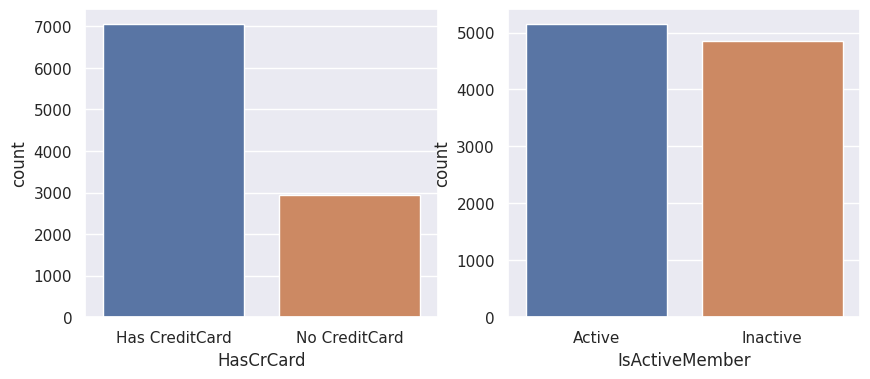

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
fig,axs = plt.subplots(1,2)
sns.countplot(data = df2,x = "HasCrCard",ax=axs[0])
sns.countplot(data = df2,x = "IsActiveMember",ax=axs[1])

most of customers has credit card, but there are many customers that don't use it.
also the number of inactive customers is large however, number of active customer is larger

In [ ]:
df2['Exited'].value_counts()

Stayed    7963
Exited    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

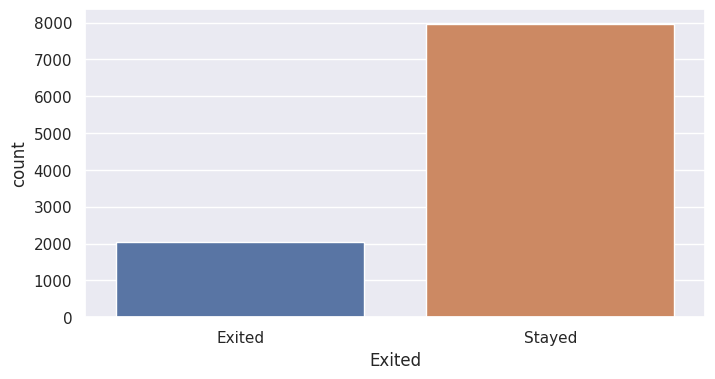

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=df2,x='Exited')

<Axes: xlabel='HasCrCard', ylabel='count'>

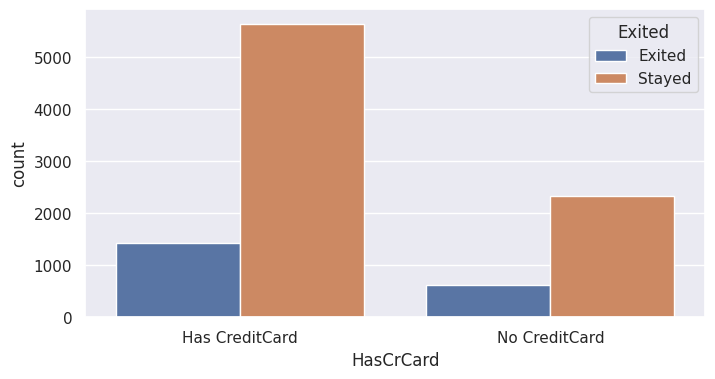

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=df2,x='HasCrCard',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

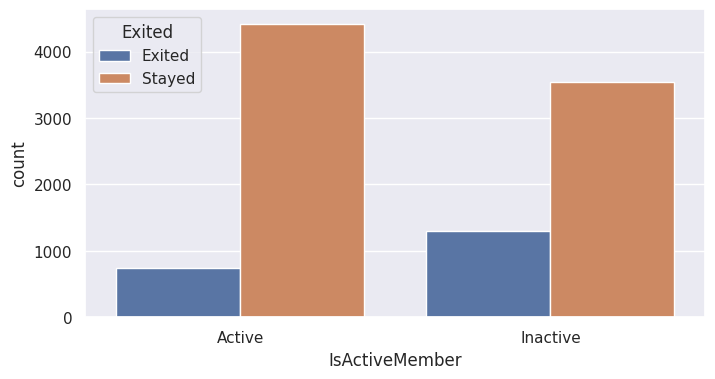

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=df2,x='IsActiveMember',hue='Exited')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

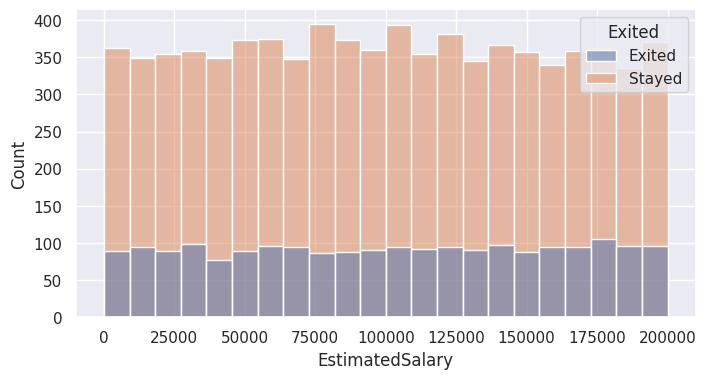

In [ ]:
sns.histplot(data=df2,x='EstimatedSalary',hue='Exited')

<Axes: xlabel='CreditScore', ylabel='Count'>

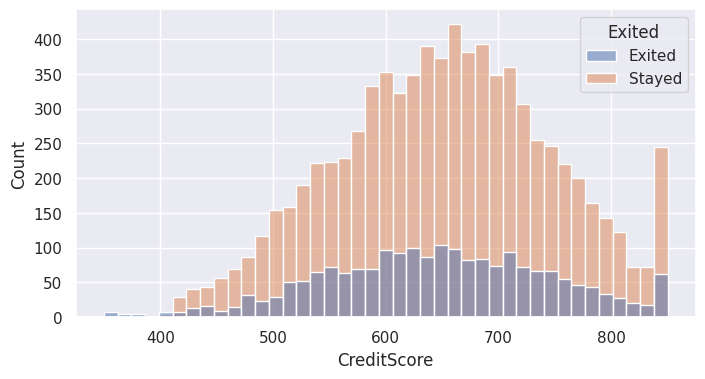

In [ ]:
sns.histplot(data=df2,x='CreditScore',hue='Exited')

<Axes: xlabel='Age', ylabel='Count'>

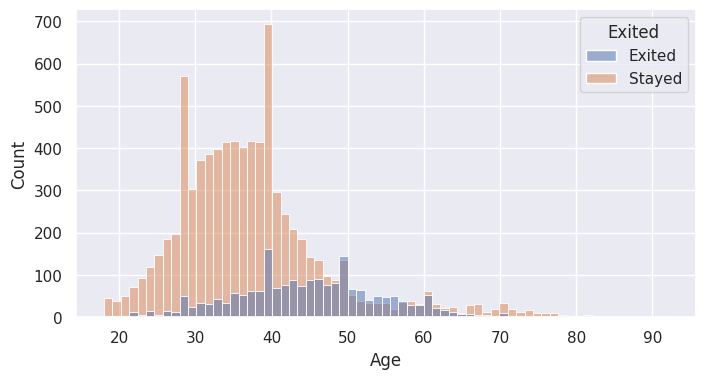

In [ ]:
sns.histplot(data=df2,x='Age',hue='Exited')

<Axes: xlabel='Tenure', ylabel='Count'>

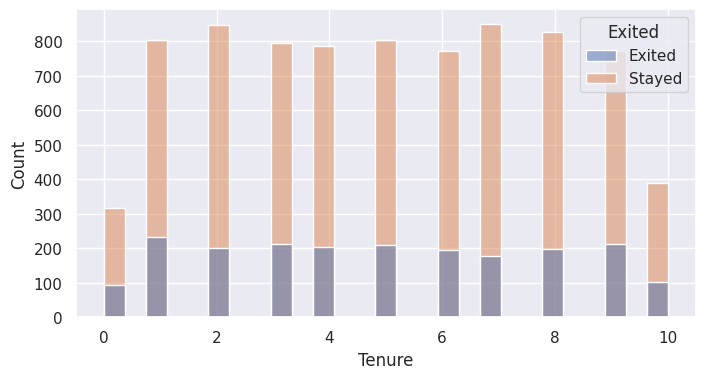

In [ ]:
sns.histplot(data=df2,x='Tenure',hue='Exited')

<Axes: xlabel='Balance', ylabel='Count'>

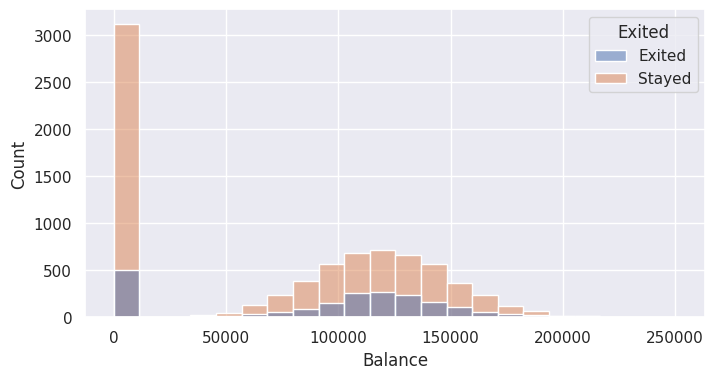

In [ ]:
sns.histplot(data=df2,x='Balance',hue='Exited')

In [ ]:
fig = px.sunburst(df2, path=['Geography', 'Exited'],title= 'Relation between Geography and Status')
fig.update_traces(textinfo='label + percent parent')

We note that the percentage of Exited customers in Germany is much compared to France and Spain

In [ ]:
fig = px.sunburst(df2, path=['Gender', 'Exited'],title= 'Relation between Gender and Status')
fig.update_traces(textinfo='label + percent parent')

In [ ]:
fig = px.sunburst(df2, path=['NumOfProducts', 'Exited'],title= 'Relation between use NumOfProducts and Status')
fig.update_traces(textinfo='label + percent parent')

28% from customers who use one product tends to churn. and
customers who use two products tends to stay at the bank, while who use 3 or 4 products tends to churn

In [ ]:
fig = px.sunburst(df2, path=['HasCrCard', 'Exited'],title= 'Relation between  HasCrCard and Status')
fig.update_traces(textinfo='label + percent parent')

In [ ]:
fig = px.sunburst(df2, path=['IsActiveMember', 'Exited'],title= 'Relation between IsActiveMember and Status')
fig.update_traces(textinfo='label + percent parent')

27% from inactive customers tends to churn

<Axes: xlabel='Age', ylabel='Count'>

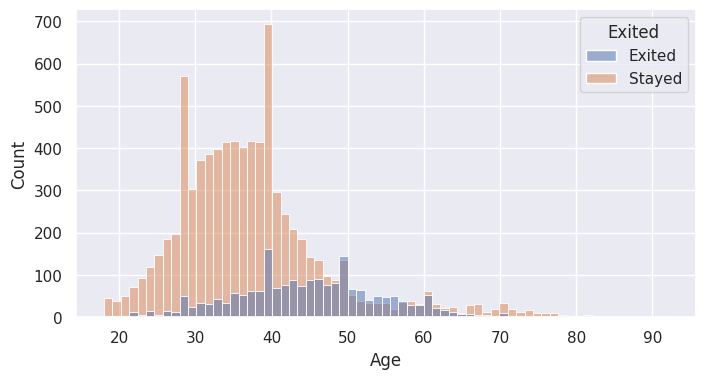

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data=df2,x='Age',hue='Exited')

we note most of stayes customers were youth, but The oldest customers tends to churn more as compared to youth

<ipython-input-22-189feb34f0dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



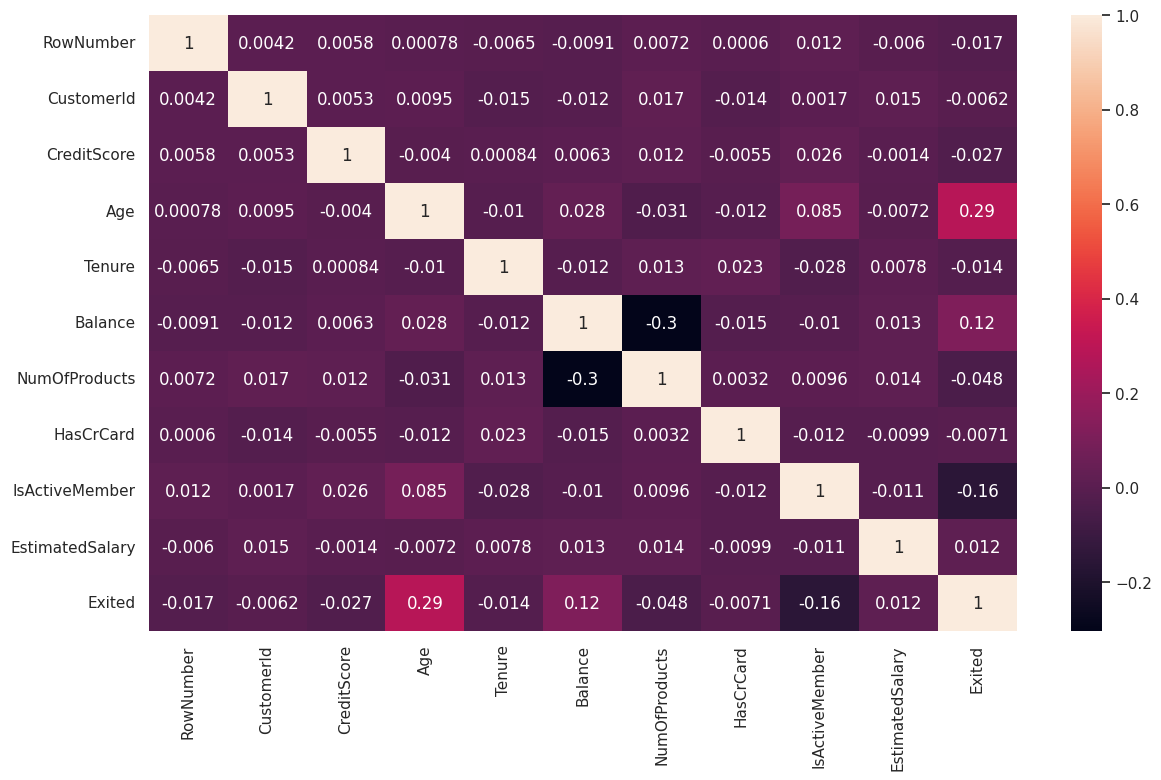

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<ipython-input-39-14425ec714e0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



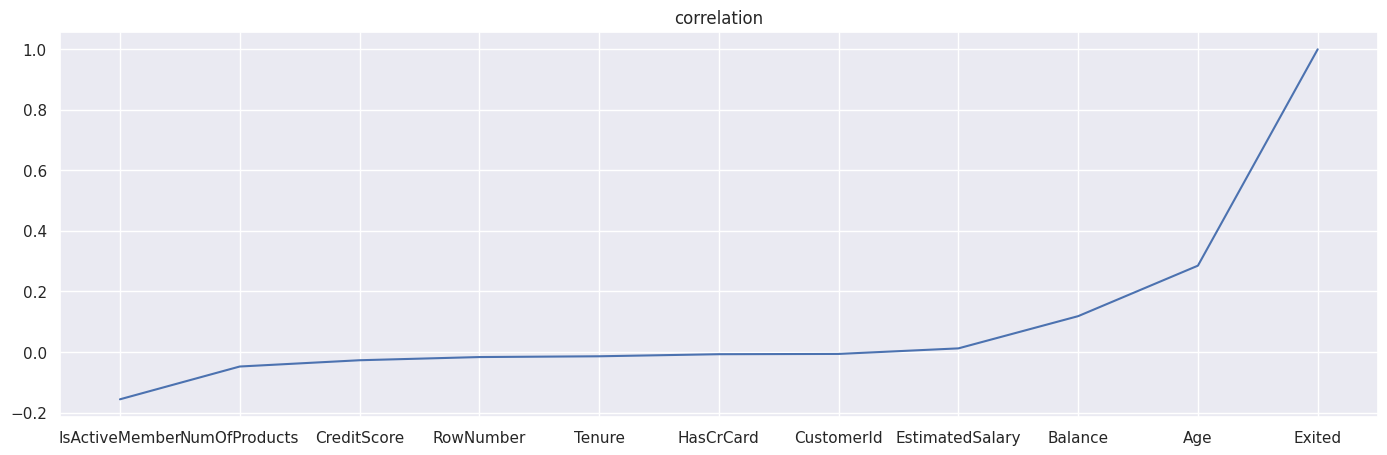

In [ ]:
corr=df.corr()
x=corr['Exited'].sort_values()
plt.figure(figsize=(17,5))
plt.plot(x)
plt.title("correlation")
plt.show()

the Age is the most related feature

#preprocessing phase

In [ ]:
df3=df.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Transform categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df3['encodedGeography']=le.fit_transform(df3['Geography'])
df3['encodedGender']=le.fit_transform(df3['Gender'])

In [ ]:
df3=df3.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)
df3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,encodedGeography,encodedGender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [ ]:
X=df3.drop('Exited',axis=1)
y=df3['Exited']

Features selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(X,y)
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
NumOfProducts,0.071461
Age,0.071215
IsActiveMember,0.010137
CreditScore,0.004918
encodedGender,0.003888
EstimatedSalary,0.002704
HasCrCard,0.001799
Tenure,0.001261
Balance,0.000000
encodedGeography,0.000000


#dealing with unbalanced

In [ ]:
df3['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Exited'>

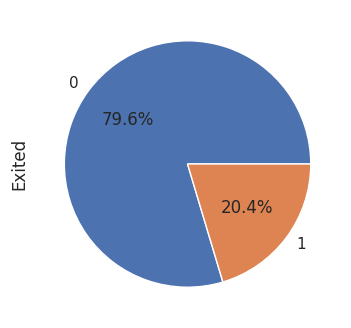

In [ ]:
df3['Exited'].value_counts().plot.pie(autopct="%1.1f%%")


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


<Axes: ylabel='Exited'>

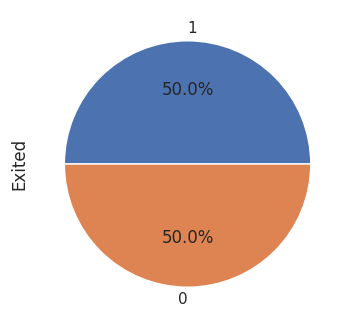

In [ ]:
y.value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(12740, 10)
(3186, 10)


#dealing with different scaling


In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,encodedGeography,encodedGender
13555,741,38,6,157368.254332,1,1,0,133445.196600,1,0
1665,749,42,1,129776.720000,2,0,1,143538.510000,0,1
14878,597,37,3,0.000000,2,0,0,7384.809265,0,0
7471,658,55,8,119327.930000,1,0,1,119439.660000,1,0
2582,656,46,5,113402.140000,2,1,1,138849.060000,0,0
...,...,...,...,...,...,...,...,...,...,...
13418,686,53,9,0.000000,1,0,0,85439.757551,0,0
5390,735,38,1,0.000000,3,0,0,92220.120000,0,0
860,667,43,8,190227.460000,1,1,0,97508.040000,0,1
15795,707,47,2,0.000000,1,1,0,152404.931466,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}


In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('-'*30)


Training Model LR 
--------------
Training Accuracy: 0.7710361067503925
Testing Accuracy: 0.7705586942875079
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8709576138147567
Testing Accuracy: 0.815442561205273
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.8446624803767661
Testing Accuracy: 0.8402385436283741
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.7875078468298807
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.8650345260514752
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.7929356357927787
Testing Accuracy: 0.7969240426867545
------------------------------


GridSearchCV with RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a random forest classifier
rfc = RandomForestClassifier()

# define the parameter grid for the grid search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

# perform the grid search using 5-fold cross-validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and their corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8531397174254316


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8628374136848713

In [ ]:
#train accuracy
y_pred2 = best_clf.predict(X_train)
accuracy_score(y_train,y_pred2)

0.9998430141287284

GridSearchCV with SVC

In [ ]:
svc = SVC()

# define the parameter grid for the grid search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}


# perform the grid search using 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and their corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.8321821036106751


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8358443188951663

GridSearchCV with KNN

In [ ]:

# create a KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}


# perform the grid search using 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and their corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score: 0.8304552590266876


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8370998116760828

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,encodedGeography,encodedGender
0,619,42,2,0.000000,1,1,1,101348.880000,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,2,0
2,502,42,8,159660.800000,3,1,0,113931.570000,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,2,0
...,...,...,...,...,...,...,...,...,...,...
15921,772,51,6,115381.491805,2,1,0,92795.833680,1,0
15922,702,44,4,96440.000861,1,1,0,97643.105383,0,0
15923,601,49,8,170129.557545,1,0,0,149508.750656,0,0
15924,696,37,8,98251.017169,1,0,0,182478.420498,1,0


In [ ]:
newx=X[['Age','IsActiveMember','NumOfProducts','Balance']]
newx

,Age,IsActiveMember,NumOfProducts,Balance
0,42,1,1,0.000000
1,41,1,1,83807.860000
2,42,0,3,159660.800000
3,39,0,2,0.000000
4,43,1,1,125510.820000
...,...,...,...,...
15921,51,0,2,115381.491805
15922,44,0,1,96440.000861
15923,49,0,1,170129.557545
15924,37,0,1,98251.017169


In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(newx,y,random_state=42,test_size=0.2,shuffle=True)
print(X_train.shape)


(12740, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('-'*30)


Training Model LR 
--------------
Training Accuracy: 0.7353218210361068
Testing Accuracy: 0.7441933458882611
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8301412872841444
Testing Accuracy: 0.7831136220966729
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7878335949764521
Testing Accuracy: 0.7984934086629002
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9550235478806908
Testing Accuracy: 0.7620841180163214
------------------------------
Training Model RF 
--------------
Training Accuracy: 0.954945054945055
Testing Accuracy: 0.77338355304457
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.7511773940345369
Testing Accuracy: 0.7671060891399875
------------------------------
